<a href="https://colab.research.google.com/github/Gabrielsandbox/Python-Codebase/blob/main/AnaliseExplorat%C3%B3ria_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Teoria
#
#Operacão x Analítico
#
#Problemas encontrados em dados:
# - Duplicidades - A mesma informação duplicada
# - Consistência - Registros aparecem duas vezes com características diferentes
# - Completude
# - Conformidade - Dado fora dos padrões para aquela informação ou incorreto
# - Integridade - "Cliente cadastrado mas que não existe"

In [ ]:
import pandas as pd #Utilizar e manusear dataframes
import seaborn as srn #Análise Exploratória através de gráficos(Conhecer os dados)
import statistics as sts #Subistituir valores faltantes com a mediana e calcular desvio padrão para usar como parametro para a busca de outliers

In [ ]:
dataset = pd.read_csv('/content/Churn.csv', sep = ';')
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
dataset.shape

(999, 12)

In [ ]:
#Primeiro problema - Colunas sem nomes ou com nomes aleatórios
#Solução:
dataset.columns = ['id', 'Score', 'Estado', 'Gênero', 'Idade', 'Patrimonio', 'Saldo', 'Produtos', 'TemCartCredito',
                   'Ativo', 'Salario', 'Saiu']

In [ ]:
dataset.head()

,id,Score,Estado,Gênero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [ ]:
#Nota: Criar modelo de Churn Análise
#Churn Análise: Problema de marketing com objetivo de prever os clientes que vão deixar a empresa
#para que se possa tomar alguma medida para previnir a saída desses clientes

#1 - Fazer análise exploratória - Conhecer os dados
#Se há valores faltantes - Se for numério substitui com a mediana
#se são categórios substitui com a moda(valor mais comum)/com mais ocorrência

In [ ]:
#Análise Exploratória - Duas técnicas - Técnicas Gráficas e Resumos estatísticos
#Objetivo - Observar os erros e problemas nos dados
#Primeiro fazer análise exploratória dos dados categórios e depois dos numéricos
#categórios - Contagem de categorías + Gráfico de barra ou gráfico de setor
#numéricos - Resumo extatístico + histograma + boxplot

In [ ]:
#Categóricos
#
#Estado
agrupado = dataset.groupby(['Estado']).size()
agrupado

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

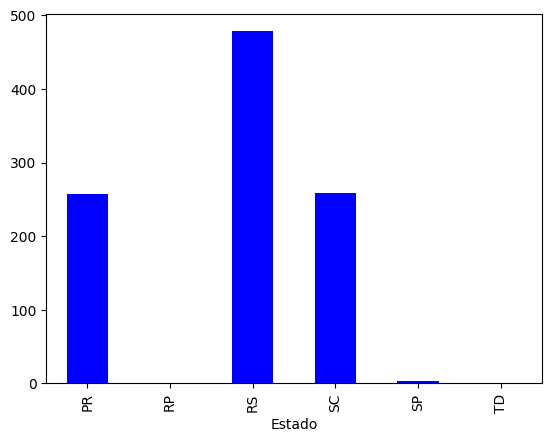

In [ ]:
agrupado.plot.bar(color = 'blue')

In [ ]:
agrupado = dataset.groupby(['Gênero']).size()
agrupado

Gênero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Gênero'>

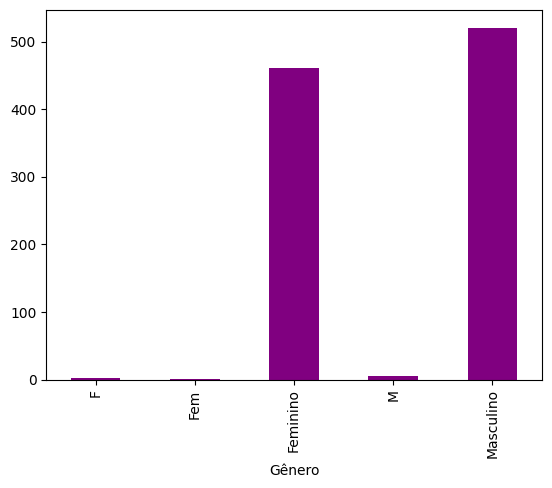

In [ ]:
agrupado.plot.bar(color = 'purple')

In [ ]:
#Numéricos
#
#Score
dataset['Score'].describe()
#Quando 50%(Mediana) e a Mean(média) estão próximas é um indicio
#de que não existem grandes outliers, de que existe uma distribuição regular dos dados

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

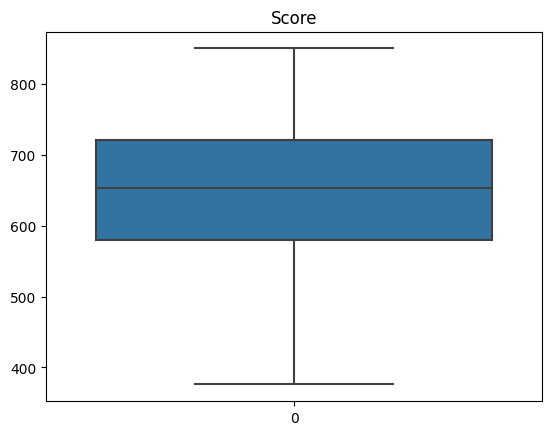

In [ ]:
srn.boxplot(dataset['Score']).set_title('Score')

<ipython-input-11-029b41b1c5d0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Score']).set_title('Score') #Deprecated on seaborn v0.14.0


Text(0.5, 1.0, 'Score')

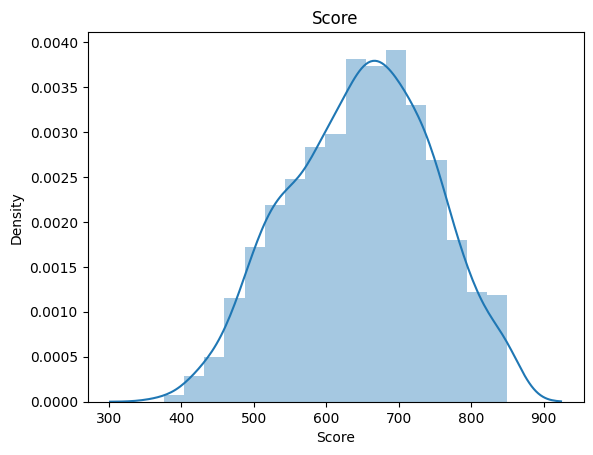

In [ ]:
srn.distplot(dataset['Score']).set_title('Score') #Deprecated on seaborn v0.14.0

In [ ]:
#Idade
dataset['Idade'].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

Text(0.5, 1.0, 'Idade')

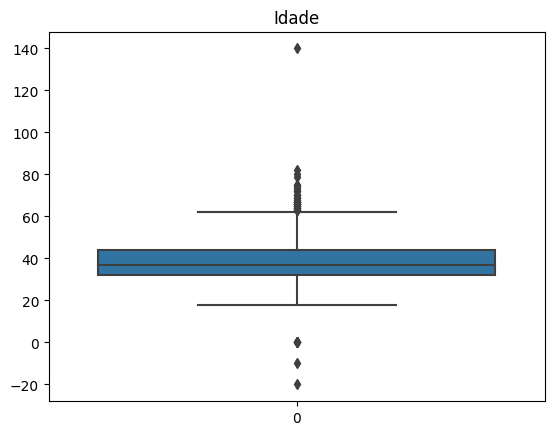

In [ ]:
srn.boxplot(dataset['Idade']).set_title('Idade')

<Axes: xlabel='Idade', ylabel='Count'>

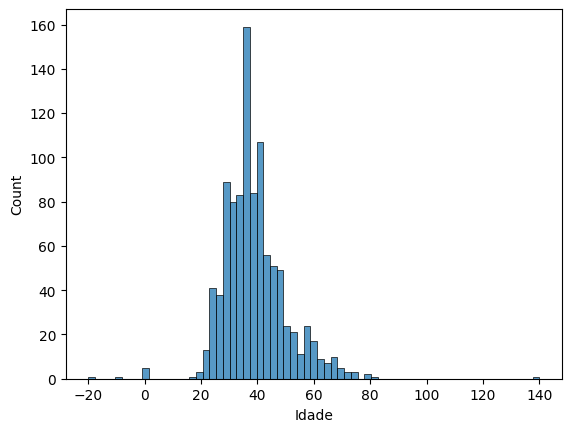

In [ ]:
srn.histplot(dataset['Idade'])

In [ ]:
dataset['Saldo'].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

In [ ]:
srn.boxplot(dataset['Saldo']).set_title('Saldo')

In [ ]:
dataset['Salario'].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [ ]:
srn.boxplot(dataset['Salario']).set_title('Salario')

<ipython-input-19-6873f43eaa22>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  srn.distplot(dataset['Salario']).set_title('Salario')


Text(0.5, 1.0, 'Salario')

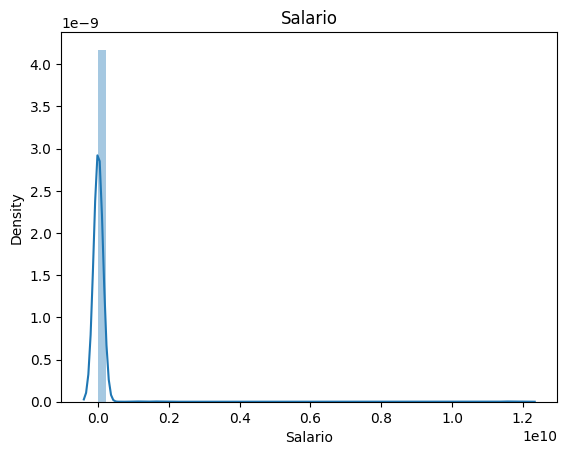

In [ ]:
srn.distplot(dataset['Salario']).set_title('Salario')